In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Generate or load data
np.random.seed(42)
N = 100
data = {
    "Age": np.random.randint(18, 70, size=N),
    "BMI": np.random.uniform(18.5, 40, size=N),
    "BloodPressure": np.random.randint(90, 180, size=N),
    "ActivityLevel": np.random.uniform(1, 10, size=N),
    "HealthScore": np.random.uniform(0, 100, size=N)
}

df = pd.DataFrame(data)

# Handle missing values if any (filling with column means in this case)
df = df.fillna(df.mean())

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [41]:
from dataclasses import dataclass
from typing import Tuple, Optional
import os
import warnings
import platform

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


@dataclass
class ClusterAnalyzer:
    """
    A class to perform and visualize K-means clustering analysis.
    
    Attributes:
        n_samples (int): Number of samples to generate
        n_features (int): Number of features for each sample
        n_centers (int): Number of cluster centers
        random_state (int): Random state for reproducibility
        n_threads (int): Number of threads to use for computation
    """
    n_samples: int = 300
    n_features: int = 2
    n_centers: int = 4
    random_state: int = 42
    n_threads: int = 2
    
    def __post_init__(self) -> None:
        """
        Initialize the analyzer and set thread control for Windows systems.
        """
        if platform.system() == 'Windows':
            os.environ['OMP_NUM_THREADS'] = str(self.n_threads)
            warnings.filterwarnings('ignore', category=UserWarning, 
                                 module='sklearn.cluster._kmeans')
    
    def generate_data(self) -> Tuple[np.ndarray, np.ndarray]:
        """
        Generate synthetic dataset with clear cluster structure.
        
        Returns:
            Tuple containing features array and target array
        """
        return make_blobs(
            n_samples=self.n_samples,
            n_features=self.n_features,
            centers=self.n_centers,
            random_state=self.random_state
        )
    
    def perform_clustering(self, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray, KMeans]:
        """
        Perform standardization and K-means clustering on input data.
        
        Args:
            X (np.ndarray): Input features
            
        Returns:
            Tuple containing:
                - scaled features (np.ndarray)
                - cluster labels (np.ndarray)
                - fitted KMeans model
        """
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        kmeans = KMeans(
            n_clusters=self.n_centers,
            random_state=self.random_state,
            n_init='auto'  # Suppress future warning
        )
        cluster_labels = kmeans.fit_predict(X_scaled)
        
        return X_scaled, cluster_labels, kmeans
    
    def visualize_clusters(
        self,
        X_scaled: np.ndarray,
        cluster_labels: np.ndarray,
        title: str = 'K-means Clustering Results'
    ) -> None:
        """
        Create visualization of the clusters.
        
        Args:
            X_scaled (np.ndarray): Scaled feature array
            cluster_labels (np.ndarray): Cluster assignments
            title (str): Plot title
        """
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                            c=cluster_labels, cmap='viridis')
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.colorbar(scatter, label='Cluster Label')
        plt.show()

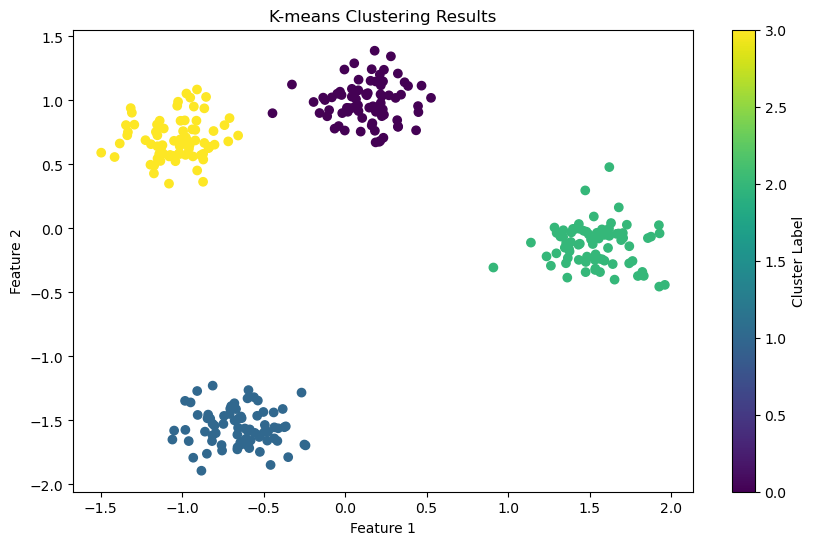

Cluster Centers:
 [[ 0.13143596  0.98564007]
 [-0.64929923 -1.55675468]
 [ 1.53816887 -0.12928168]
 [-1.03586967  0.69654164]]
Inertia: 17.466197609060576


In [44]:
analyzer = ClusterAnalyzer()
X, y = analyzer.generate_data()
X_scaled, cluster_labels, kmeans = analyzer.perform_clustering(X)
analyzer.visualize_clusters(X_scaled, cluster_labels)
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Inertia:", kmeans.inertia_)

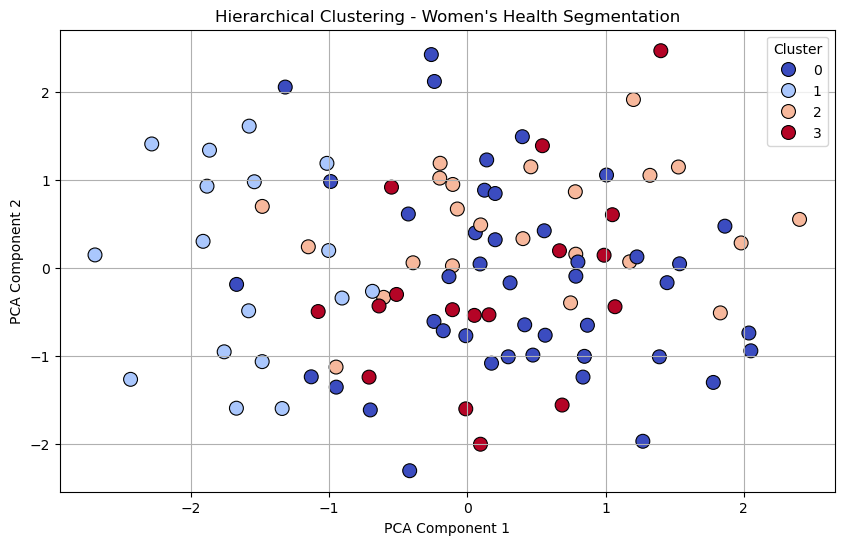

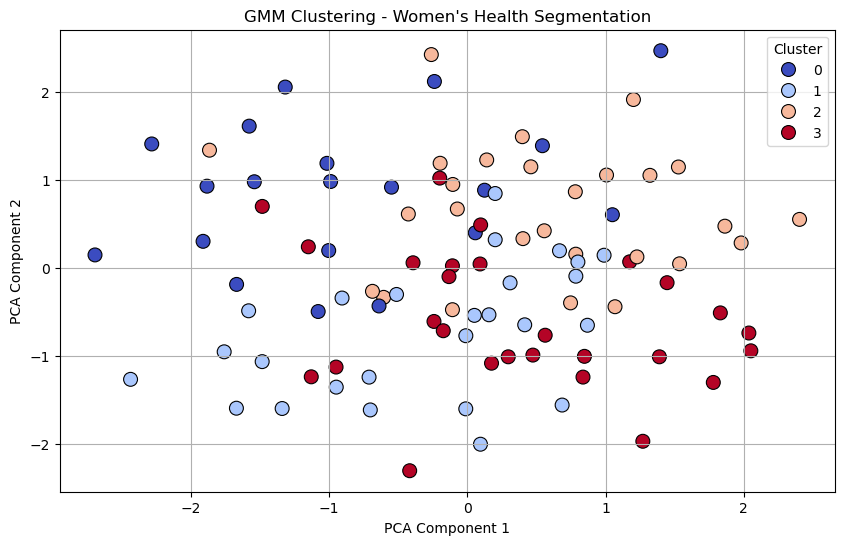

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# PCA for visualization (2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot Hierarchical Clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=hierarchical_labels, palette="coolwarm", s=100, edgecolor='black')
plt.title("Hierarchical Clustering - Women's Health Segmentation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Plot GMM results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=gmm_labels, palette="coolwarm", s=100, edgecolor='black')
plt.title("GMM Clustering - Women's Health Segmentation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


In [11]:
# Adding the cluster labels back to the DataFrame for further analysis
df["Hierarchical Cluster"] = hierarchical_labels
df["GMM Cluster"] = gmm_labels

# Personalized healthcare recommendations
recommendations = []
for i in range(len(df)):
    cluster = df["GMM Cluster"].iloc[i]
    if cluster == 0:
        recommendations.append("Recommended: Regular Check-ups, Preventive Healthcare Services")
    elif cluster == 1:
        recommendations.append("Recommended: Mental Health Support, Therapy, Mindfulness")
    elif cluster == 2:
        recommendations.append("Recommended: Fitness Programs, Nutritional Plans")
    else:
        recommendations.append("Recommended: Maternity Care, Reproductive Health Services")

df["Healthcare Recommendations"] = recommendations

# Display recommendations for some individuals
df.head(10)


,Age,BMI,BloodPressure,ActivityLevel,HealthScore,Hierarchical Cluster,GMM Cluster,Healthcare Recommendations
0,56,22.053239,169,9.233780,17.320187,1,0,"Recommended: Regular Check-ups, Preventive Hea..."
1,69,18.836183,92,4.331428,43.385165,0,2,"Recommended: Fitness Programs, Nutritional Plans"
2,46,27.603132,109,1.139110,39.850473,0,2,"Recommended: Fitness Programs, Nutritional Plans"
3,32,26.989953,148,9.354867,61.585010,0,1,"Recommended: Mental Health Support, Therapy, M..."
4,60,24.809996,125,4.853657,63.509365,2,2,"Recommended: Fitness Programs, Nutritional Plans"
5,25,18.802716,108,9.699893,4.530401,0,0,"Recommended: Regular Check-ups, Preventive Hea..."
6,38,22.775112,179,9.672580,37.461261,1,1,"Recommended: Mental Health Support, Therapy, M..."
7,56,33.793852,156,8.677085,62.585992,2,2,"Recommended: Fitness Programs, Nutritional Plans"
8,36,35.488774,108,3.650040,50.313626,0,2,"Recommended: Fitness Programs, Nutritional Plans"
9,40,31.528139,109,4.465880,85.648984,0,3,"Recommended: Maternity Care, Reproductive Heal..."
